In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RandomForest Model
from xgboost import XGBClassifier #RandomForest Model

from sklearn.linear_model import LogisticRegression #Logistic Model

from sklearn.model_selection import GridSearchCV# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score#cross validation score

from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 

## Read data

In [80]:
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-']
df = pd.read_csv(r"C:\Users\muhammedkeles\crdio\data\raw\cardio_data.csv",sep=";",na_values = missing_values)

In [81]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [82]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

* id :> It's just the Id no of the row. Not revelant
* age :> It's the age of a person in Days
* gender :> It's the gender of the person
* height :> It's the height of the person in cm
* weight :> It's the weight of the person in kg
* ap_hi :> It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 120mmhg or Below
* ap_low :> It's the Diastolic blood pressure i.e. Pressure exerted when Blood exerts between arteries and heartbeats. Normal Value : 80mmhg or Below
* cholesterol :> It's the Cholestreol value (Cholesterol is a type of fat found in your blood) of your blood. In Adults, 200 mg/dL is desired with 200 and 239 mg/dL as Boderline High. In Children, 170 mg/dL is desired with 170 and 199 mg/dL as Boderline High
* gluc :> It's the Glucose Level. They're less than 100 mg/dL after not eating (fasting) for at least 8 hours. And they're less than 140 mg/dL 2 hours after eating. For most people without diabetes, blood sugar levels before meals hover around 70 to 80 mg/dL
* smoke :> It contain Binary Values stating whether Person is a Smoker or not i.e. {0 : 'Not a Smoker', 1 : 'Smoker'}
* alco :> It contain Binary Values stating whether Person is an alchoalic or not i.e. {0 : 'Not a Alchoalic', 1 : 'Alchoalic'}
* active :> It contain Binary Values stating whether Person is involved in physical activites or not i.e. {0 : 'Not involved in Physical Activites', 1 : 'involved in physical activites'}
* cardio :> It's our Target Value Binary Values stating whether Person has Cardiovascular diseases (CVDs) or Not i.e. {0 : 'Not Have CVD', 1 : 'Have CVD'}

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [84]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# id column değerlerinin verisetinden atılması
df.drop(columns=['id'], inplace=True)

## Check missing values

In [86]:
features_with_null = [features for feature in df.columns if df[feature].isnull().sum()>0]
if features_with_null:
    print('Features with Null Values {}'.format(features_with_null))
else:
    print('Dataset contains no Null Values')

Dataset contains no Null Values


## Check duplicate values

In [87]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 24


In [88]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10494,16937,2,170,70.0,120,80,1,1,0,0,0,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
1142,17493,2,169,74.0,120,80,1,1,0,0,1,1
50432,17493,2,169,74.0,120,80,1,1,0,0,1,1
32683,17535,2,165,65.0,120,80,1,1,0,0,1,0


In [89]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 69976 datapoints remaining with 12 features


In [90]:
#yaş column değerlerinin gün tipinde verildiği için bunları yıl tipine dönüştürmemiz gerekir.
df['age'] = (df['age'] / 365).round().astype('int')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [91]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 3792


In [92]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)
duplicated.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1751,46,2,183,80.0,120,80,1,1,0,0,0,0
24137,46,2,183,80.0,120,80,1,1,0,0,0,0
23200,58,2,180,100.0,120,80,1,1,0,0,1,0
61467,58,2,180,100.0,120,80,1,1,0,0,1,0
21200,56,2,180,80.0,150,90,1,1,0,0,1,1


* gün tipinden yıl tipine dönüştürüldükten sonra bazı verilerimiz aynı yaş değerine sahip oldu aslında aralarında günler var!
* çözümü : ya gün tipinde tutacağız yada tekrar edenleri atakacağız.

In [93]:
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 66184 datapoints remaining with 12 features


In [94]:
# 1-> woman
# 2-> man
df['gender'].value_counts()

1    42541
2    23643
Name: gender, dtype: int64

In [95]:
df.groupby("gender")["height"].mean()

gender
1    161.204062
2    169.996828
Name: height, dtype: float64

In [96]:
# target imbalance durumu yok 
df['cardio'].value_counts(normalize=True)

1    0.513614
0    0.486386
Name: cardio, dtype: float64

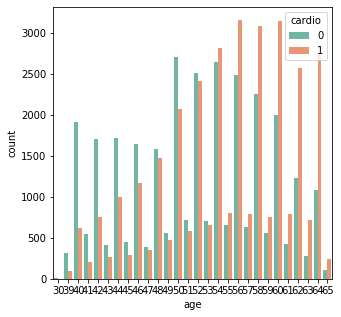

In [97]:
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");
#54 yaşından büyük olan örneklerde cardio değerleri positif yoğunluğu arttığı grafikten anlaşılmakta

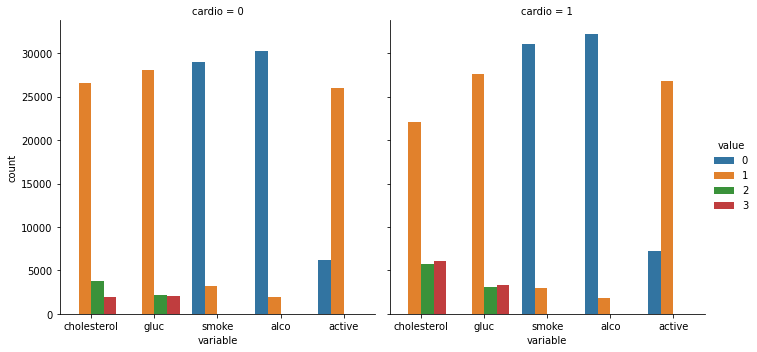

In [98]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

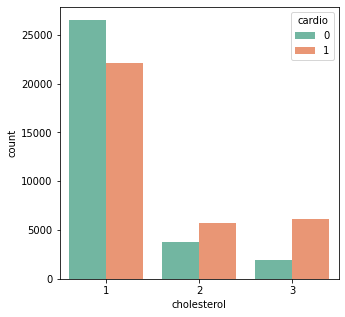

In [99]:
sns.countplot(x='cholesterol', hue='cardio', data = df, palette="Set2");
#kolestrol seviyesi arttıkça cardio durumundaki pozitif durumlar çoğalıyor.

In [100]:
df.groupby("cardio")["gender"].value_counts()

cardio  gender
0       1         20713
        2         11478
1       1         21828
        2         12165
Name: gender, dtype: int64

## OUTLIER

In [101]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight']])

For the feature height, No of Outliers is 518
For the feature weight, No of Outliers is 1282


<AxesSubplot:xlabel='cardio', ylabel='weight'>

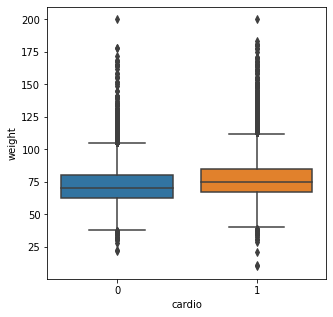

In [102]:
sns.boxplot(x="cardio",y = "weight",data=df)

<AxesSubplot:xlabel='cardio', ylabel='height'>

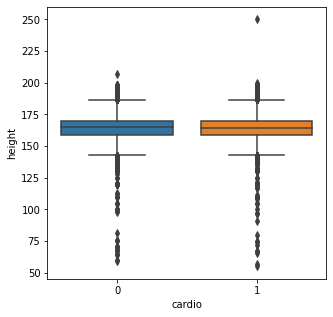

In [103]:
sns.boxplot(x="cardio",y = "height",data=df)

In [104]:
df.drop(df[(df['height'] > df['height'].quantile(0.995)) | (df['height'] < df['height'].quantile(0.05))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.995)) | (df['weight'] < df['weight'].quantile(0.05))].index,inplace=True)

<AxesSubplot:xlabel='cardio', ylabel='height'>

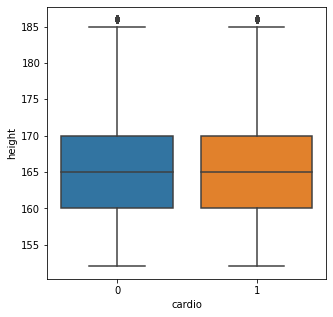

In [105]:
sns.boxplot(x="cardio",y = "height",data=df)

<AxesSubplot:xlabel='cardio', ylabel='weight'>

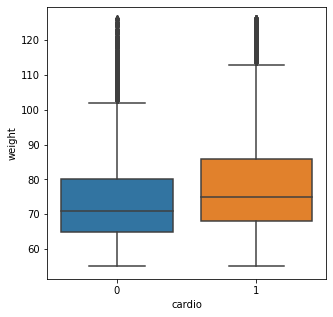

In [106]:
sns.boxplot(x="cardio",y = "weight",data=df)

<AxesSubplot:xlabel='cardio', ylabel='ap_hi'>

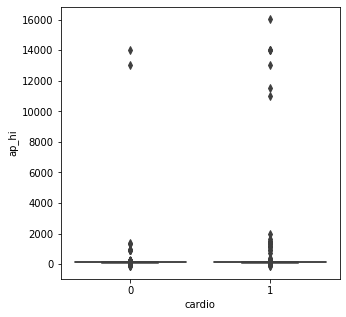

In [107]:
sns.boxplot(x="cardio",y = "ap_hi",data=df)

<AxesSubplot:xlabel='cardio', ylabel='ap_lo'>

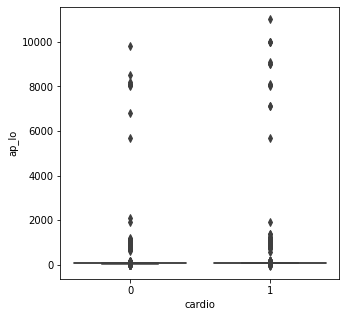

In [108]:
sns.boxplot(x="cardio",y = "ap_lo",data=df)

In [109]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

<AxesSubplot:xlabel='cardio', ylabel='ap_hi'>

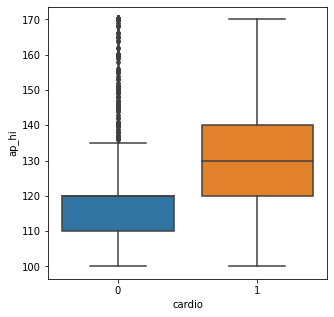

In [110]:
sns.boxplot(x="cardio",y = "ap_hi",data=df)

<AxesSubplot:xlabel='cardio', ylabel='ap_lo'>

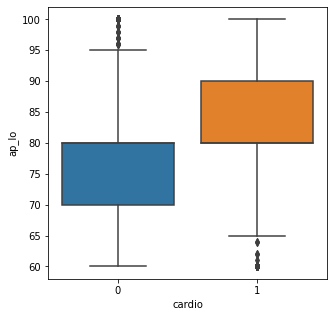

In [111]:
sns.boxplot(x="cardio",y = "ap_lo",data=df)

In [112]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,56649.000000,56649.000000,56649.000000,56649.000000,56649.000000,56649.000000,56649.000000,56649.000000,56649.000000,56649.000000,56649.000000,56649.000000
mean,53.360448,1.378012,165.383008,75.523384,126.812883,81.407933,1.380148,1.238274,0.095783,0.058059,0.795142,0.513001
std,6.784762,0.484895,7.051349,12.869564,14.619074,8.510948,0.690031,0.585805,0.294296,0.233858,0.403601,0.499835
min,30.000000,1.000000,152.000000,55.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,186.000000,126.000000,170.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


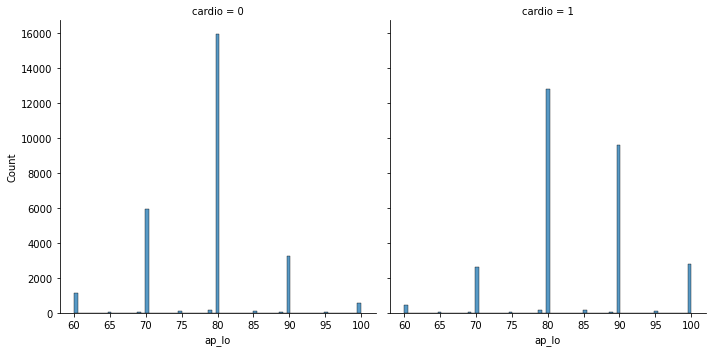

In [113]:
sns.displot(df,x="ap_lo",col="cardio")

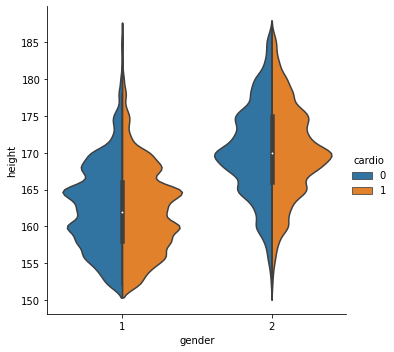

In [114]:
sns.catplot(data=df,kind="violin",x="gender",y="height",hue="cardio",split=True)
# boy uzunluğu ile erkek cinsiyeti doğru orantılı

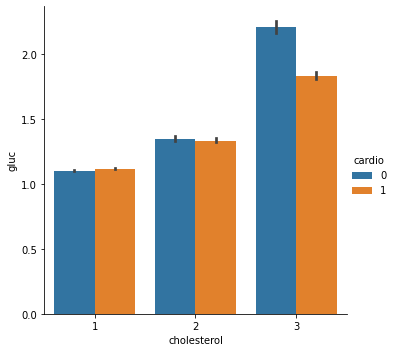

In [115]:
sns.catplot(data=df,kind="bar",x="cholesterol",y="gluc",hue="cardio")

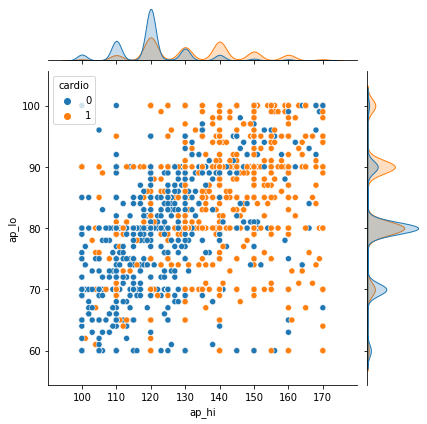

In [116]:
sns.jointplot(data=df,x="ap_hi",y="ap_lo",hue="cardio")

In [117]:
#sns.catplot(x="gender", y="bmi", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);
#alkol kullanan kadınlar alkol kullanan erkeklere göre daha riskli !

## FEATURE ENGINEERING


In [118]:
df['bmi'] = df['weight']/((df['height']/100)**2)

def pulse(data):
    return np.subtract(data['ap_hi'], data['ap_lo'])
 
df['pulse'] = df.apply(pulse, axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30.0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50.0
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60.0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50.0
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40.0


In [119]:
# yaşlar kullanılarak olgunluk özniteliği çıkarıldı.
df.loc[(df["age"]<18),"new_age"]="young"
df.loc[(df["age"]>=18),"new_age"]="middle"
df.loc[(df["age"]>=54),"new_age"]="old"

In [120]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse,new_age
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30.0,middle
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50.0,old
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60.0,middle
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50.0,middle
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40.0,middle


In [121]:
# bmi değerleri kullanılarak sağlık durumu özniteliği çıkarıldı.
df.loc[(df["bmi"]<18.5),"new_bmi"]="under"
df.loc[(df["bmi"]>=18.5) & (df["bmi"]<=24.99),"new_bmi"]="healty"
df.loc[(df["bmi"]>=25) & (df["bmi"]<=29.99),"new_bmi"]="over"
df.loc[(df["bmi"]>=30),"new_bmi"]="obese"

In [122]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse,new_age,new_bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30.0,middle,healty
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50.0,old,obese
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60.0,middle,healty
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50.0,middle,over
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40.0,middle,healty


In [123]:
# ap_hi,ap_lo değerleri kullanılarak nabız değerleri çıkarıldı.
df.loc[(df["ap_lo"]<=89),"blood_pressure"]="normal"
df.loc[(df["ap_lo"]>=90),"blood_pressure"]="hyper"
df.loc[(df["ap_hi"]<=120),"blood_pressure"]="normal"
df.loc[(df["ap_hi"]>120),"blood_pressure"]="middle"
df.loc[(df["ap_hi"]>=140),"blood_pressure"]="hyper"

In [124]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse,new_age,new_bmi,blood_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30.0,middle,healty,normal
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50.0,old,obese,hyper
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60.0,middle,healty,middle
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50.0,middle,over,hyper
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40.0,middle,healty,normal


In [125]:
scaler = LabelEncoder()
df["new_age"] = scaler.fit_transform(df["new_age"])
df["new_bmi"] = scaler.fit_transform(df["new_bmi"])
df["blood_pressure"] = 2-scaler.fit_transform(df["blood_pressure"])


In [126]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse,new_age,new_bmi,blood_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30.0,0,0,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50.0,1,1,2
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60.0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50.0,0,2,2
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40.0,0,0,0


## CORRELATION MATRIX
* Korelasyon matrisinden anlaşıldığı üzere targetimizi yüksek olarak etkileyen featurelar : age,weight,ap_hi,ap_lo,cholesterol,gluc(dolaylı)

C:\Users\muhammedkeles\AppData\Local\Temp\ipykernel_6512\1739053159.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


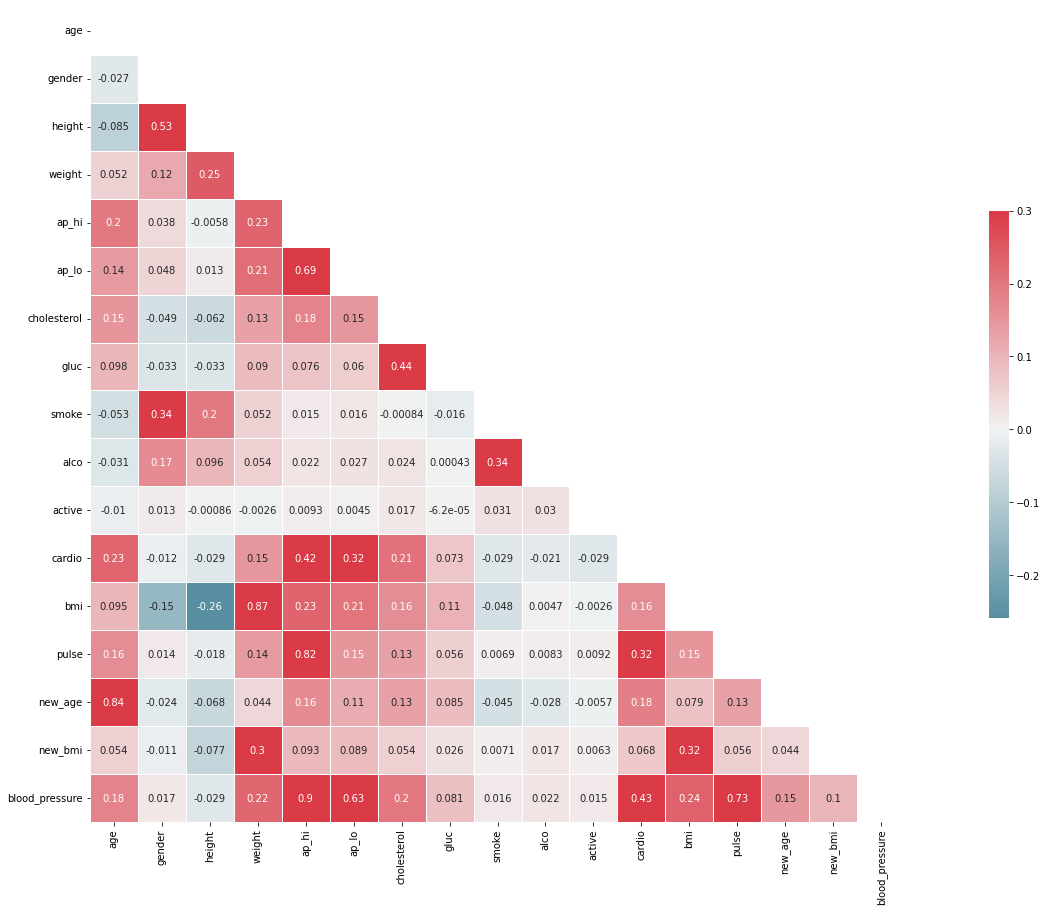

In [127]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

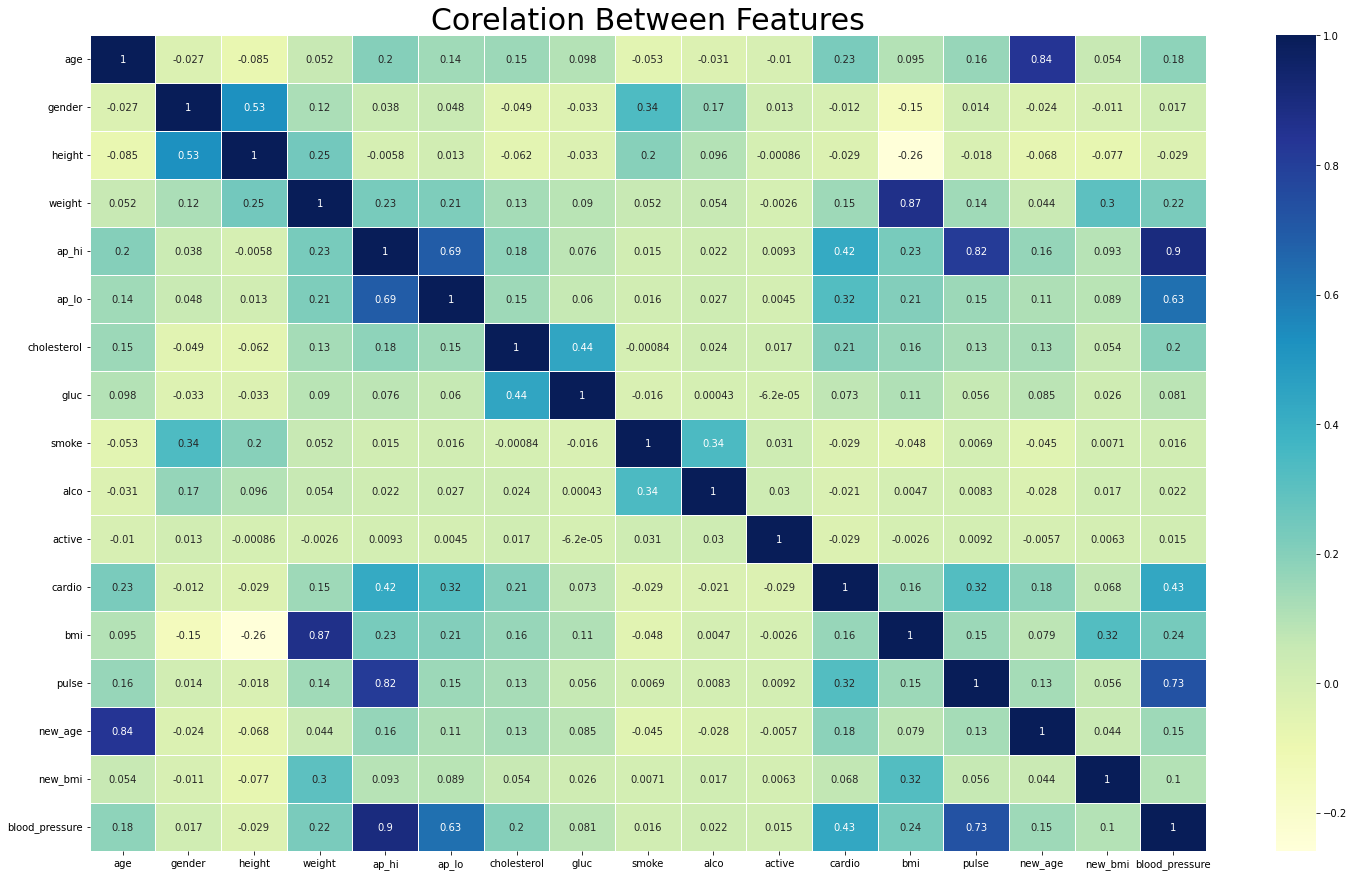

In [128]:
plt.rcParams['figure.figsize'] = (25, 15) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

In [129]:
#sns.jointplot(data=df,x="age",y="pulse",hue="cardio")

## FEATURE SELECTION

In [130]:
#age,ap_hi,ap_lo,cholestrol ve pulse featureları target ile doğrudan yüksek korelasyona sahip
#kalan featurelar hem target ile az korelasyona sahip hemde korelasyonu olan featureları etkiliyorlar bu yüzden bunların atılması gerekir.
X = df.drop(['cardio', 'bmi', 'weight','height', 'gluc', 'gender', 'smoke', 'alco', 'active','new_age','new_bmi','blood_pressure'], axis =1)
Y = df['cardio']

In [131]:
X.head()

,age,ap_hi,ap_lo,cholesterol,pulse
0,50,110,80,1,30.0
1,55,140,90,3,50.0
2,52,130,70,3,60.0
3,48,150,100,1,50.0
4,48,100,60,1,40.0


In [132]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

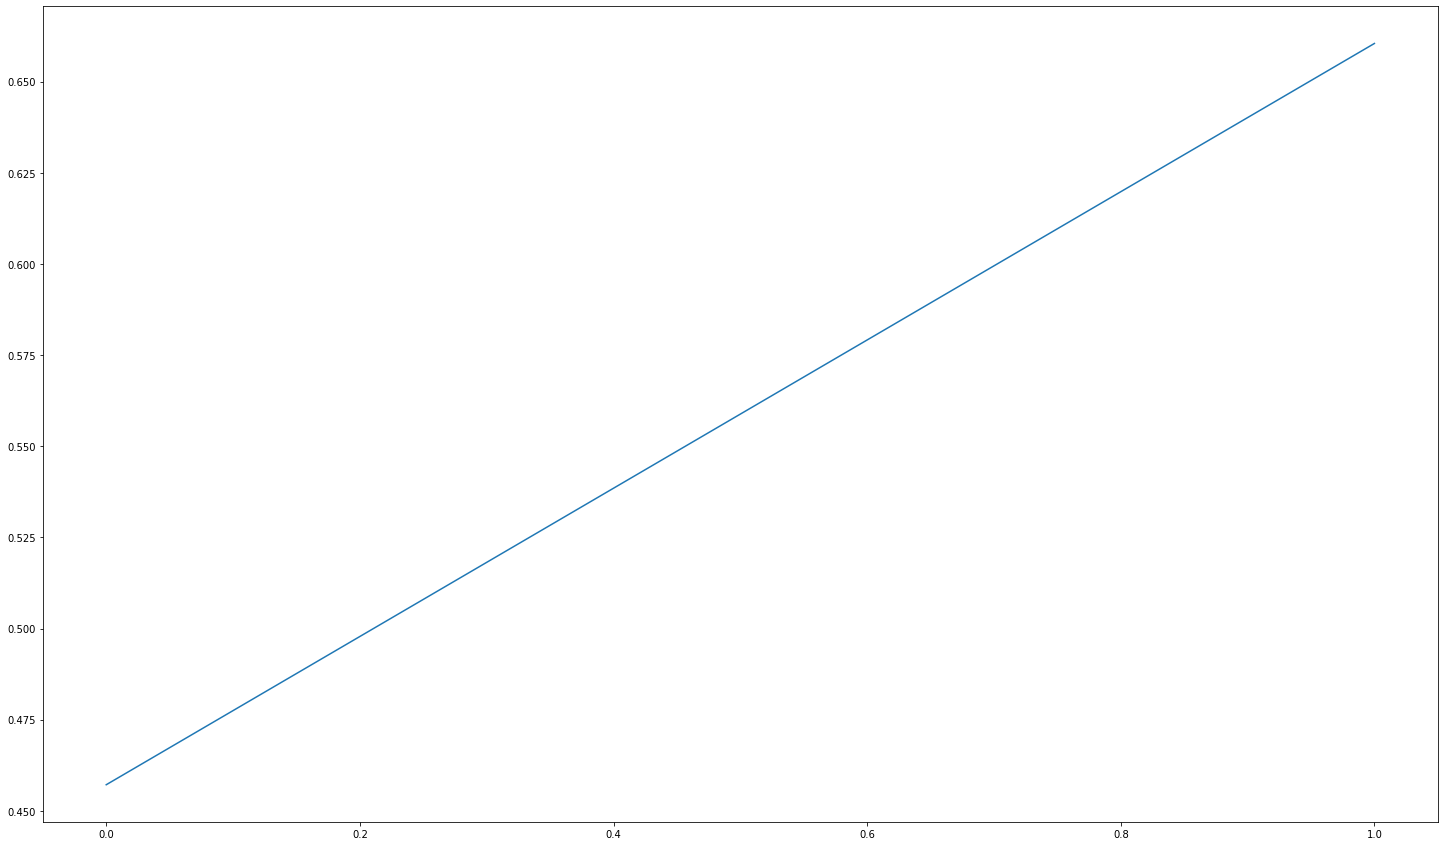

In [133]:
from sklearn.decomposition import PCA

scaled_data = StandardScaler().fit_transform(X)

pca = PCA()
pca.n_components = 2
pca_data = pca.fit_transform(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

## TRAIN TEST SPLIT

In [134]:
#train test split
X_data, X_hold, y_data, y_hold = train_test_split(X, Y, test_size=0.1, random_state=42, shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, shuffle = True)


In [135]:
print(X_hold.shape)
print(y_hold.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5665, 5)
(5665,)
(40787, 5)
(10197, 5)
(40787,)
(10197,)


In [136]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODELLING

### KNN CLASSIFIER

In [137]:
#model selection
"""params = {'n_neighbors':list(range(40, 60)),
          'weights':['uniform', 'distance'],
          'p':[0,1,2]}

knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn, param_grid=params, cv=10) 
knn_grid_cv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",knn_grid_cv.best_params_)"""

print("Best Hyper Parameters:"+"{'n_neighbors': 59, 'p': 2, 'weights': 'uniform'}")

Best Hyper Parameters:{'n_neighbors': 59, 'p': 2, 'weights': 'uniform'}


In [138]:
#training
knn = KNeighborsClassifier(n_neighbors=59, p=2, weights='uniform')
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=59)

In [139]:
#evaluation
scores = cross_val_score(knn, X_train, y_train, cv=10)
print('KNN Model gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

KNN Model gives an average accuracy of 71.65 % with minimun of 70.75 % and maximum of 72.93 % accuracy


In [140]:
Y_hat = knn.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5062
           1       0.74      0.69      0.71      5135

    accuracy                           0.72     10197
   macro avg       0.72      0.72      0.72     10197
weighted avg       0.72      0.72      0.72     10197



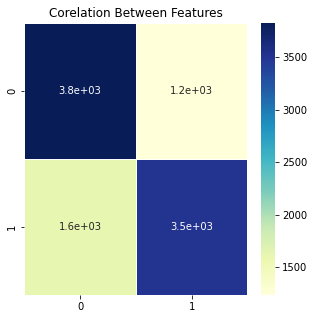

In [141]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [142]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 3518
True Negative Cases : 3825
False Positive Cases : 1237
False Negative Cases : 1617


### RANDOM FOREST

In [143]:
"""params = { 
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth' : [3,5,7,10,20],
    'criterion' : ['entropy','gini']
}

rfc_gridcv = RandomForestClassifier(random_state=42)
rfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 10, n_jobs = -1)
rfc_gridcv.fit(X_train, y_train)
print("Best Hyper Parameters:\n",rfc_gridcv.best_params_)"""

#print("Best Hyper Parameters:{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}")


'params = { \n    \'n_estimators\': [10, 50, 100, 150, 200],\n    \'max_depth\' : [3,5,7,10,20],\n    \'criterion\' : [\'entropy\',\'gini\']\n}\n\nrfc_gridcv = RandomForestClassifier(random_state=42)\nrfc_gridcv = GridSearchCV(estimator=rfc_gridcv, param_grid=params, cv= 10, n_jobs = -1)\nrfc_gridcv.fit(X_train, y_train)\nprint("Best Hyper Parameters:\n",rfc_gridcv.best_params_)'

In [144]:
rfc = RandomForestClassifier(random_state=42, n_estimators=200, max_depth= 7, criterion = 'gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [145]:
Y_hat = rfc.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      5062
           1       0.74      0.70      0.72      5135

    accuracy                           0.72     10197
   macro avg       0.72      0.72      0.72     10197
weighted avg       0.72      0.72      0.72     10197



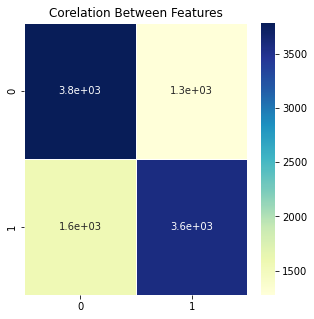

In [146]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [147]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 3574
True Negative Cases : 3786
False Positive Cases : 1276
False Negative Cases : 1561


### LOGISTIC REGRESSION

In [148]:
logreg_with_l2 = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'liblinear')
logreg_with_l2.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [149]:
scores = cross_val_score(logreg_with_l2, X_train, y_train, cv=10)
print('Logistic Model with L2 Penalty gives an average accuracy of {0:.2f} % with minimun of {1:.2f} % and maximum of {2:.2f} % accuracy'.format(scores.mean() * 100, scores.min() * 100, scores.max() * 100))

Logistic Model with L2 Penalty gives an average accuracy of 71.27 % with minimun of 70.21 % and maximum of 72.05 % accuracy


In [150]:
Y_hat = logreg_with_l2.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      5062
           1       0.73      0.68      0.71      5135

    accuracy                           0.72     10197
   macro avg       0.72      0.72      0.72     10197
weighted avg       0.72      0.72      0.72     10197



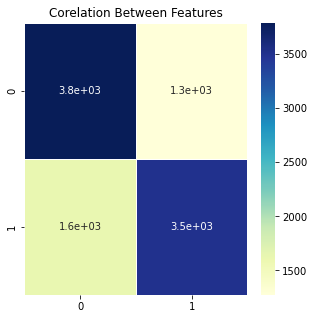

In [151]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

In [152]:
print('True Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

True Positive Cases : 3508
True Negative Cases : 3788
False Positive Cases : 1274
False Negative Cases : 1627


### XGBOOST

In [153]:
params = { 
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth' : [3,5,7,10,20],
    'criterion' : ['entropy','gini']
}

In [155]:
xgb_gridcv = XGBClassifier(random_state=42)
xgb_gridcv = GridSearchCV(estimator=xgb_gridcv, param_grid=params, cv= 10, n_jobs = -1)
xgb_gridcv.fit(X_train,y_train)
best_params = xgb_gridcv.best_params_

[11:04:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion" } are not used.



In [156]:
best_params

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 10}

In [160]:
model = XGBClassifier(n_estimators = best_params["n_estimators"],max_depth = best_params["max_depth"])
model.fit(X_train,y_train)
ypred = model.predict(X_test)
preds = [round(value) for value in ypred]

In [163]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      5062
           1       0.73      0.71      0.72      5135

    accuracy                           0.72     10197
   macro avg       0.72      0.72      0.72     10197
weighted avg       0.72      0.72      0.72     10197



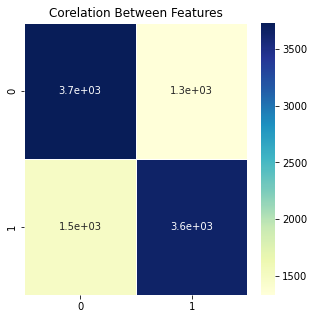

True Positive Cases : 3645
True Negative Cases : 3729
False Positive Cases : 1333
False Negative Cases : 1490


In [165]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, preds), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

print('True Positive Cases : {}'.format(confusion_matrix(y_test, preds)[1][1]))
print('True Negative Cases : {}'.format(confusion_matrix(y_test, preds)[0][0]))
print('False Positive Cases : {}'.format(confusion_matrix(y_test, preds)[0][1]))
print('False Negative Cases : {}'.format(confusion_matrix(y_test, preds)[1][0]))